### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([5597,6219,7701,7702,7981,9323,9324,9326,9327,9329,9330,9331,9664,9665,9666,9668,9669,9670,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680,9681,9682,9683,9684,9685,9686,9687,9690,9692,9693,9694,9695,9696,9697,9849,14399,14858,16436,17038,18030,18031,20854,22384,23092,23539,23540,23569,23570,23730,25930,30216,30678,32308,34448,34449,36398,36456,37765,37902,37903,37904,37905,37913,37929,37931,37960,37963,37970,37971,37972,37973,37974,37975,37976,37977,37979,37980,37981,37983,37984,37985,37987,37988,37989,37990,37991,37992,37993,37994,37995,37996,37997,37999,38000,38002,38004,38005,38006,38007,38008,38009,38010,38011,38012,38013,38014,38018,38020,38021,38022,38023,38024,38025,38026,38029,38030,38031,38032,38034,38035,38036,38037,38039,38040,38041,38042,38043,38044,38045,38046,38047,38048,38049,38050,38051,38052,38054,38055,38058,38059,38060,38062,38063,38064,38065,38067,38068,38069,38070,38071,38072,38073,38074,38075,38076,38077,38078,38079,38080,38081,38082,38083,38084,38086,38087,38088,38089,38090,38091,38092,38093,38094,38095,38096,38097,38098,38099,38101,38102,38103,38106,38107,38109,38110,38111,38112,38113,38114,38115,38116,38117,38119,38120,38121,38124,38127,38129,38132,38133,38134,38135,38136,38137,38138,38139,38140,38141,38143,38144,38147,38148,38149,38150,38151,38153,38156,38157,38159,38160,38161,38164,38165,38167,38168,38169,38171,38173,38174,38175,38176,38177,38178,38180,38181,38182,38183,38184,38185,38187,38188,38190,38191,38192,38193,38194,38195,38196,38198,38199,38202,38203,38204,38205,38207,38208,38209,38210,38211,38212,38213,38214,38215,38216,38217,38218,38219,38220,38221,38223,38224,38226,38228,38229,38230,38231,38234,38235,38236,38237,38238,38239,38240,38241,38242,38243,38245,38246,38247,38248,38249,38250,38251,38252,38254,38256,38257,38258,38259,38260,38262,38263,38264,38265,38267,38268,38269,38270,38271,38272,38273,38274,38275,38277,38278,38279,38280,38281,38282,38284,38285,38286,38287,38288,38289,38290,38291,38292,38293,38294,38297,38298,38299,38300,38302,38303,38304,38305,38306,38308,38312,38313,38316,38317,38318,38319,38320,38321,38322,38324,38328,38329,38330,38331,38332,38336,38337,38338,38339,38340,38341,38342,38343,38344,38345,38346,38348,38349,38350,38351,38352,38353,38354,38356,38357,38358,38359,38360,38361,38363,38364,38366,38368,38369,38370,38371,38372,38373,38374,38377,38378,38379,38380,38381,38382,38384,38385,38386,38388,38389,38390,38391,38392,38393,38394,38395,38396,38397,38398,38399,38400,38420,38828,38829,38830,38831,38832,38833,38834,38836,38840,38841,38842,38843,38844,38846,38847,38850,38855,38857,38860,38862,38863,38864,38866,38867,38869,38870,38871,38872,38873,38874,38875,38876,38877,38878,38879,38880,38881,38882,38883,38884,38885,38886,38887,38888,38889,38890,38891,38892,38893,38894,38895,38896,38897,38898,38899,38900,38902,38906,38907,38909,38914,38915,38916,38917,38918,38919,38920,38921,38922,38923,38924,38925,38926,38927,38930,38931,38933,38934,38936,38937,38938,38939,38940,38941,38944,38946,38949,38950,38952,38953,38954,38955,38956,38957,38958,38959,38960,38961,38962,38963,38964,38965,38966,38967,38968,38969,38970,38971,38972,38973,38974,38975,38976,38981,38982,38983,38985,38986,38987,38988,38990,38992,38994,38999,39000,39004,39006,39007,39010,39021,39022,39024,39025,39027,39036,39039,39772,45338,46354,46783,49241,49242,49243,52863,54119,54868,55125,55551,56191,61130,61163,61208,61237,63815,63816,63818,63820,63821,63822,63823,63824,63825,63826,63827,63828,63829,63832,63837,63841,63842,63845,64801,64815,64816,64818,64819,64820,64898,65883,68906,70857,72514,73179,73364,74239,75602,77847,78091,82739,82740,83025,85433,86568,87813,87872,88349,88590,88672,89603,89712,89713,89838,91219,91249,94787,95073,95219,95220])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(627, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(196251,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

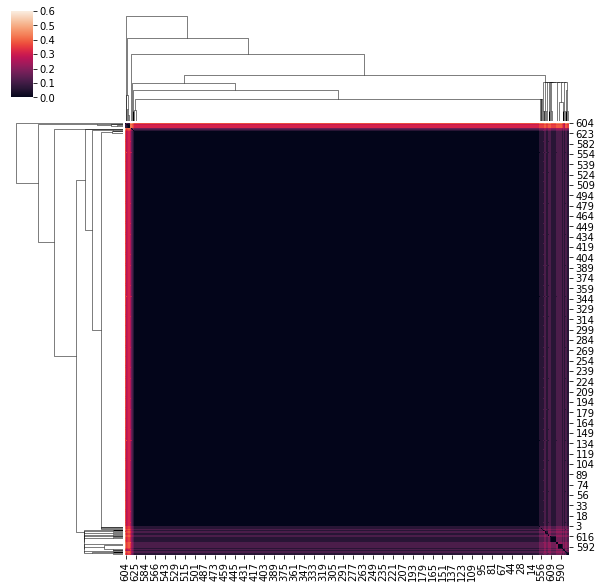

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

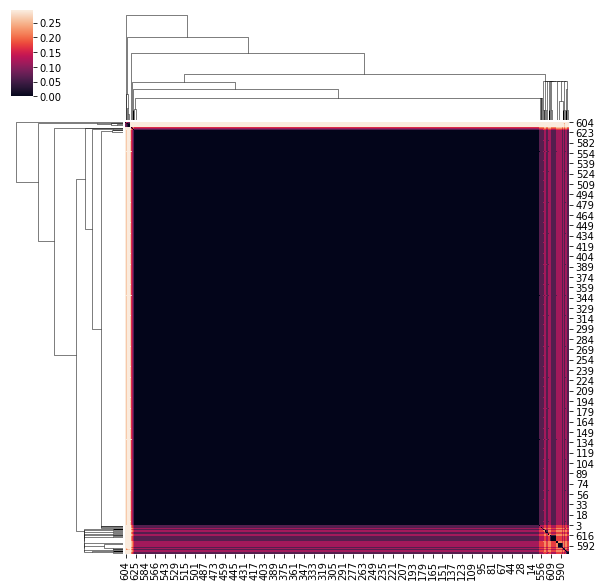

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

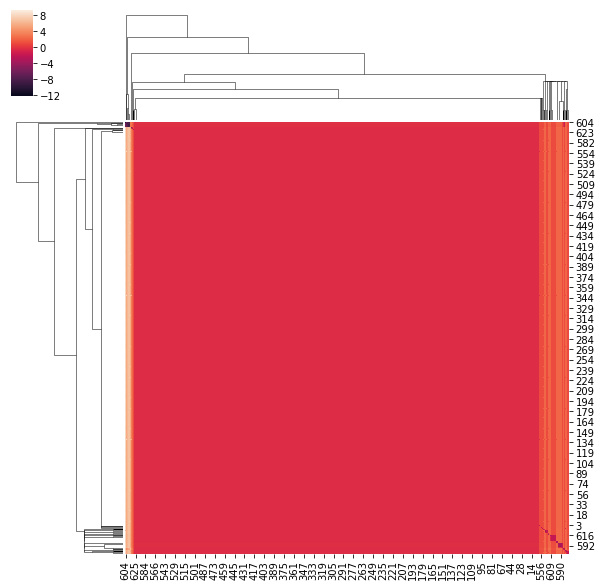

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

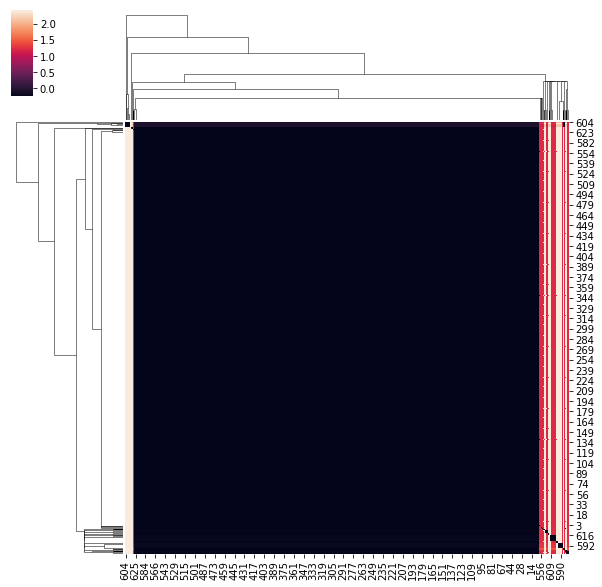

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)